# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 15th 2021

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: "ARUNAN SUTHANANTHAN"

In [39]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Explore the data [35 points]

Upload the the <code>breast_cancer_expression</code> into a Dataframe. This dataset contains the log-transformed expresions of $M$ for $N$ patients.

<hr>

### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [158]:
##Upload breast_cancer_expression.tsv
fn = "breast_cancer_expression.tsv"
df_expression = pd.read_csv(fn, sep="\t", header=0)
df_expression

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [42]:
### Number of patients
print("Number of patients:")
len(df_expression)

Number of patients:


645

In [43]:
###Number of genes
print("Number of genes:")
len(df_expression.axes[1])

Number of genes:


47

In [180]:
##Empty list to store not needed r-coefficients
empty = []

## Loop to generate linear correlation between 47 genes
for i in range(0, 47):
    for j in range(1, 47):
        if i == j:
            empty.append(0)
        else:
            linreg_expression = scipy.stats.linregress(df_expression.iloc[:, i], df_expression.iloc[:, j])
            if linreg_expression.rvalue > 0.91:
                print(df_expression.columns[i], df_expression.columns[j])
                print(linreg_expression.rvalue)

ENSG00000117399.12 ENSG00000142945.11
0.9176074418537264
ENSG00000142945.11 ENSG00000117399.12
0.9176074418537264


<hr>

### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plote a comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

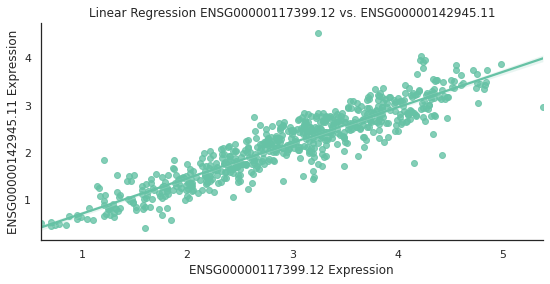

In [151]:
###Graph 1: Linear Relationship between Genes ENSG00000117399.12 and ENSG00000142945.11
sns.regplot(data=df_expression, x="ENSG00000117399.12", y="ENSG00000142945.11")
plt.title("Linear Regression ENSG00000117399.12 vs. ENSG00000142945.11")
plt.xlabel("ENSG00000117399.12 Expression")
plt.ylabel("ENSG00000142945.11 Expression")
sns.despine()

In [181]:
print("There exists a strong linear correlation between some genes in the dataset")

There exists a strong linear correlation between some genes in the dataset


In [162]:
###Graph 2: Mean Expression for all of the Genes

###List to collect the means for each gene
means = []

###For Loop 
for i in range(0, 47):
    means_value = sum(df_expression.iloc[:, i])/len(df_expression)
    means.append(means_value)
    
###Dataframe with means and gene id
df_means = pd.DataFrame({'Gene': df_expression.columns, 'Mean': means})
df_means

,Gene,Mean
0,ENSG00000011426.9,2.164062
1,ENSG00000054598.6,1.535686
2,ENSG00000062038.12,2.102870
3,ENSG00000077152.8,3.132112
4,ENSG00000082175.13,1.179845
5,ENSG00000089685.13,2.554557
6,ENSG00000091831.20,2.491631
7,ENSG00000092621.10,2.452480
8,ENSG00000094804.8,1.803410
9,ENSG00000099953.8,3.506780


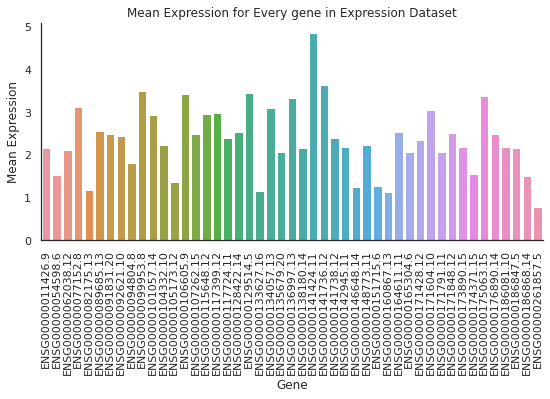

In [175]:
chart = sns.barplot(data=df_means, x="Gene", y="Mean")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart
plt.title("Mean Expression for Every gene in Expression Dataset")
plt.ylabel("Mean Expression")
sns.despine()

In [183]:
print("There is a range of mean expression from 1-5. Good to explore what the high and low expressed genes are")

There is a range of mean expression from 1-5. Good to explore what the high and low expressed genes are


<hr style="border:1px solid black"> </hr>

## Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [81]:
###PCA on dataset
X_expression = df_expression.iloc[:, 0:47]

pca_expression = sklearn.decomposition.PCA()
pca_expression.fit(X_expression)

pca_expression.explained_variance_ratio_


array([0.4895715 , 0.12409806, 0.06368292, 0.05613526, 0.02674681,
       0.02349905, 0.01876769, 0.01808656, 0.01589495, 0.0138722 ,
       0.01155553, 0.01151328, 0.01092356, 0.00948607, 0.00818814,
       0.00788844, 0.00687269, 0.00630469, 0.00607351, 0.00554516,
       0.00513478, 0.00497124, 0.00440353, 0.00410735, 0.00397289,
       0.00371193, 0.00355187, 0.00335561, 0.00313826, 0.00301558,
       0.0028311 , 0.00261559, 0.0022757 , 0.00221418, 0.00197918,
       0.00185797, 0.00170669, 0.00153196, 0.00147302, 0.00125764,
       0.00119496, 0.00109755, 0.0010269 , 0.00087041, 0.00072448,
       0.00071363, 0.00055994])

In [92]:
#Put reduced dataset into a dataframe
reduce_expression = pca_expression.transform(X_expression)
reduce_expression = pd.DataFrame(reduce_expression)

##Loop of inertia values for clusters 1-10
X_reduce = reduce_expression.iloc[:, 0:47]
inertia_expression = []

for k in range(1, 11):
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X_reduce)
    
    inertia_expression += [kmeans.inertia_]

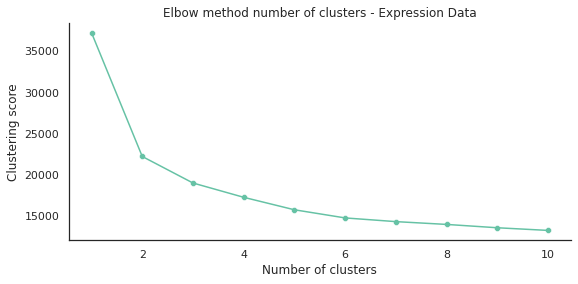

In [93]:
### Plot K vs. intertia
sns.scatterplot(x=np.arange(1, 11), y=inertia_expression)
sns.lineplot(x=np.arange(1, 11), y=inertia_expression)
plt.title("Elbow method number of clusters - Expression Data")
plt.xlabel("Number of clusters")
plt.ylabel("Clustering score")
sns.despine()

In [186]:
print("4-5 groups appropriate based on elbow method ")

4-5 groups appropriate based on elbow method 


In [119]:
X = reduce_expression.iloc[:, 0:47]
k = 5

kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

##Add clusters to dataframe
reduce_expression["cluster"] = kmeans.labels_
reduce_expression

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,cluster
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.346789,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234,0
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,-0.178576,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334,0
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.096526,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126,0
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,-0.073659,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260,0
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,0.099727,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,-0.035141,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450,4
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,-0.339486,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188,4
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.158151,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293,4
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,-0.229889,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674,4


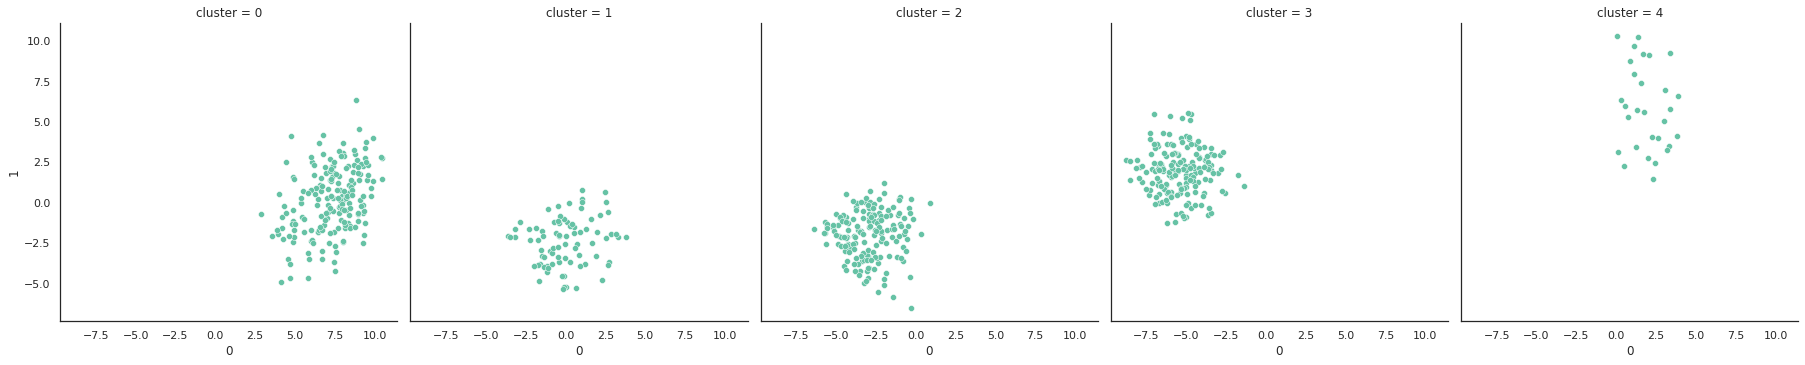

In [120]:
### Plot the clusters
sns.relplot(data=reduce_expression, x=0, y=1, col="cluster")
sns.despine()

In [187]:
print("YES it seems that we can group patients into different subsets. Not sure what separates the patients")

YES it seems that we can group patients into different subsets. Not sure what separates the patients


<hr>

### Part 2 [20 points]

After doing some reasearch in the online public database where you collected the patient expression data, you were able to extract a list of breast cancer subtype assossiated to each of your patient.

Upload the <code>breast_cancer_subtype</code> data and incorporate it to your expression data. Having this new information, re-do your clustering analysis.

Are you able to link each found cluster to a cancer subtype?

In [122]:
### Upload Breast Cancer Subtype.tsv into dataframe
fn2 = "breast_cancer_subtype.tsv"
df_subtype = pd.read_csv(fn2, sep="\t", header=0)
df_subtype

,Subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [123]:
###Incorportate subtype into Breast_Cancer_Expression Dataframe
df_expression["Subtype"] = df_subtype.iloc[:, 0]
df_expression

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


In [124]:
###PCA on dataset
X_subtype = df_expression.iloc[:, 0:47]

pca_subtype = sklearn.decomposition.PCA()
pca_subtype.fit(X_subtype)

pca_subtype.explained_variance_ratio_

array([0.4895715 , 0.12409806, 0.06368292, 0.05613526, 0.02674681,
       0.02349905, 0.01876769, 0.01808656, 0.01589495, 0.0138722 ,
       0.01155553, 0.01151328, 0.01092356, 0.00948607, 0.00818814,
       0.00788844, 0.00687269, 0.00630469, 0.00607351, 0.00554516,
       0.00513478, 0.00497124, 0.00440353, 0.00410735, 0.00397289,
       0.00371193, 0.00355187, 0.00335561, 0.00313826, 0.00301558,
       0.0028311 , 0.00261559, 0.0022757 , 0.00221418, 0.00197918,
       0.00185797, 0.00170669, 0.00153196, 0.00147302, 0.00125764,
       0.00119496, 0.00109755, 0.0010269 , 0.00087041, 0.00072448,
       0.00071363, 0.00055994])

In [125]:
###Apply reduction to data
reduce_subtype = pca_subtype.transform(X_subtype)

###Add subtype column to Dataframe
reduce_subtype = pd.DataFrame(reduce_subtype)
reduce_subtype["Subtype"] = df_expression.Subtype
reduce_subtype

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,Subtype
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.346789,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234,Basal
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,-0.178576,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334,Basal
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.096526,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126,Basal
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,-0.073659,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260,Basal
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,0.099727,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,-0.035141,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450,Normal
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,-0.339486,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188,Normal
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.158151,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293,Normal
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,-0.229889,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674,Normal


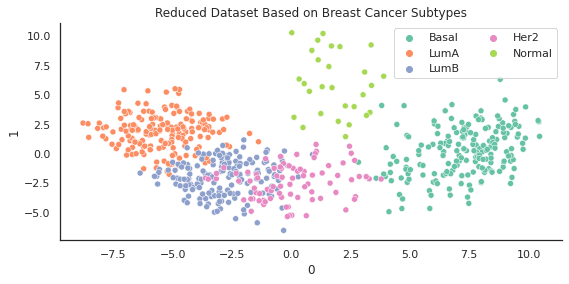

In [185]:
###Plot results of reduction based on Subtypes
sns.scatterplot(data=reduce_subtype, x=0, y=1, hue="Subtype")
plt.legend(bbox_to_anchor=(1,1))
plt.legend(ncol=2)
plt.title("Reduced Dataset Based on Breast Cancer Subtypes")
sns.despine()

In [188]:
print("Some overlap between the subtypes but also can see individual groups based on subtype")

Some overlap between the subtypes but also can see individual groups based on subtype


In [127]:
###Still using 5 clusters
X = reduce_subtype.iloc[:, 0:47]
k = 5

kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

##Add clusters to reduced dataset
reduce_subtype["cluster"] = kmeans.labels_
reduce_subtype

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,Subtype,cluster
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234,Basal,1
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334,Basal,1
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126,Basal,1
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260,Basal,1
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241,Basal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450,Normal,3
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188,Normal,3
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293,Normal,3
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674,Normal,3


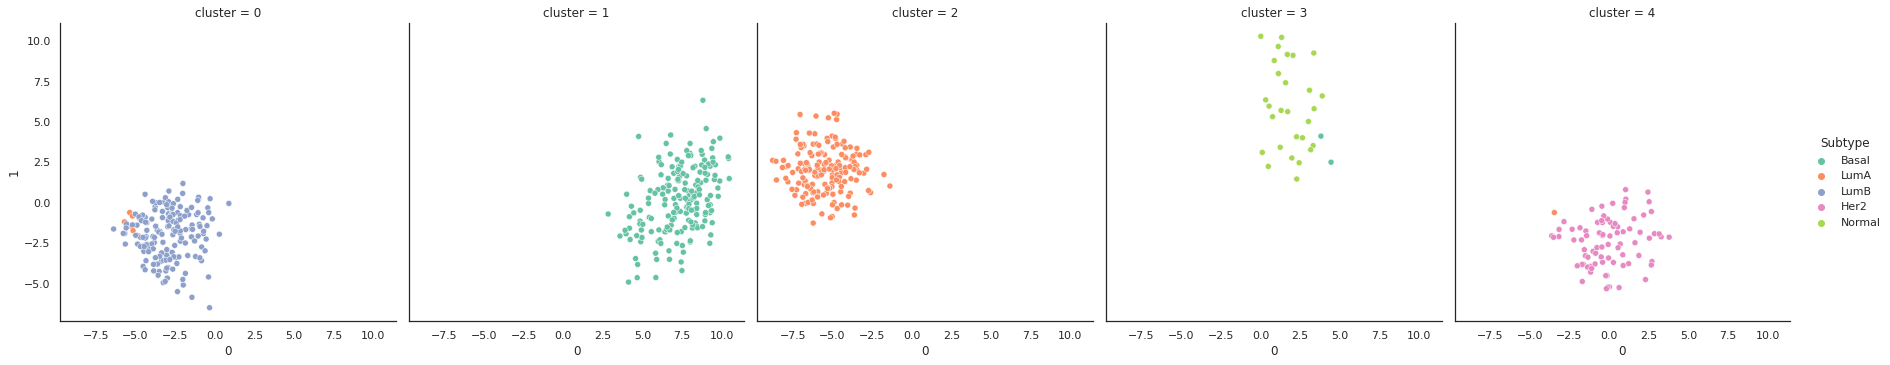

In [128]:
### Plot the clusters
sns.relplot(data=reduce_subtype, x=0, y=1, hue="Subtype", col="cluster")
sns.despine()

In [129]:
print("YES you can link each cluster to a subtype of Breast cancer with some overlap between LumA and LumB")

YES you can link each cluster to a subtype of Breast cancer with some overlap between LumA and LumB


<hr>

### Part 3 [10 points]

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

<hr>

### Part 4 [10 points]

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are the identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work [5 points]

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!